In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
JSON_DATA_PATH = "/Users/sreeharirammohan/Desktop/SCP_FOLDER/video_2/json"

In [3]:
all_json_files = os.listdir(JSON_DATA_PATH)

In [4]:
#order the json files from the first frame to the last. 
all_json_files.sort()

In [5]:
#first item in the list is the DS STORE, remove
del all_json_files[0]

In [6]:
all_json_files

['video_000000002458_keypoints.json',
 'video_000000002459_keypoints.json',
 'video_000000002460_keypoints.json',
 'video_000000002461_keypoints.json',
 'video_000000002462_keypoints.json',
 'video_000000002463_keypoints.json',
 'video_000000002464_keypoints.json',
 'video_000000002465_keypoints.json',
 'video_000000002466_keypoints.json',
 'video_000000002467_keypoints.json',
 'video_000000002468_keypoints.json',
 'video_000000002469_keypoints.json',
 'video_000000002470_keypoints.json',
 'video_000000002471_keypoints.json',
 'video_000000002472_keypoints.json',
 'video_000000002473_keypoints.json',
 'video_000000002474_keypoints.json',
 'video_000000002475_keypoints.json',
 'video_000000002476_keypoints.json',
 'video_000000002477_keypoints.json',
 'video_000000002478_keypoints.json',
 'video_000000002479_keypoints.json',
 'video_000000002480_keypoints.json',
 'video_000000002481_keypoints.json',
 'video_000000002482_keypoints.json',
 'video_000000002483_keypoints.json',
 'video_0000

In [7]:
print(len(all_json_files))

929


In [8]:
filename = os.path.join(JSON_DATA_PATH, all_json_files[1])

In [9]:
print(filename)

/Users/sreeharirammohan/Desktop/SCP_FOLDER/video_2/json/video_000000002459_keypoints.json


In [10]:
'''
This method finds the angle between the 8-9 and 9-10 segments. 
'''
def determine_angle_for_json_file(json_file_data, person_number, segment1, segment2):
    
    first_coordinate = int(segment1.split('-')[0])
    
    second_coordinate = int(segment1.split('-')[1])
    
    redundant_second_coordinate = int(segment2.split('-')[0])
    
    third_coordinate = int(segment2.split('-')[1])
    
    if not redundant_second_coordinate == second_coordinate:
        print("ERROR: Two points you find the angle between must be adjacent (share a common vertex)")
        return None
    
    #print(first_coordinate, second_coordinate, third_coordinate)
    
    #No people detected in the scene
    if (len(json_file_data["people"]) == 0):
        return
    
    # 8th segment x, y
    x_8 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*first_coordinate]
    y_8 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*first_coordinate + 1]

    # 9th segment x, y
    x_9 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*second_coordinate]
    y_9 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*second_coordinate + 1]

    #10th
    x_10 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*third_coordinate]
    y_10 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*third_coordinate + 1]
    
    
    if (x_9 == x_8 or x_10 == x_9):
        return 180 #standing straight up
    
    slope_8_9 = (y_9 - y_8)/(x_9 - x_8)
    slope_9_10 = (y_10 - y_9)/(x_10 - x_9)
    
    temp_calc = (slope_9_10 - slope_8_9)/(1 + slope_8_9*slope_9_10)
    
    angle_rad = np.arctan(temp_calc)
    
    angle = angle_rad * (180/np.pi)
    
    
    if(angle < 0):
        angle = -angle
    
    
        
    return angle
    

In [11]:
frame_number = 0
angles = []

for name in all_json_files:
    
    filename = os.path.join(JSON_DATA_PATH, name)
    
    with open(filename, 'r') as j:
        json_file_data = json.load(j)
        angle = determine_angle_for_json_file(json_file_data=json_file_data, person_number=0, segment1="8-9", segment2='9-10')
        angles.append(angle)
        frame_number += 1    

In [12]:
len(angles)

929

In [13]:
frame_number

929

In [14]:
frame_x = list(range(0, frame_number))

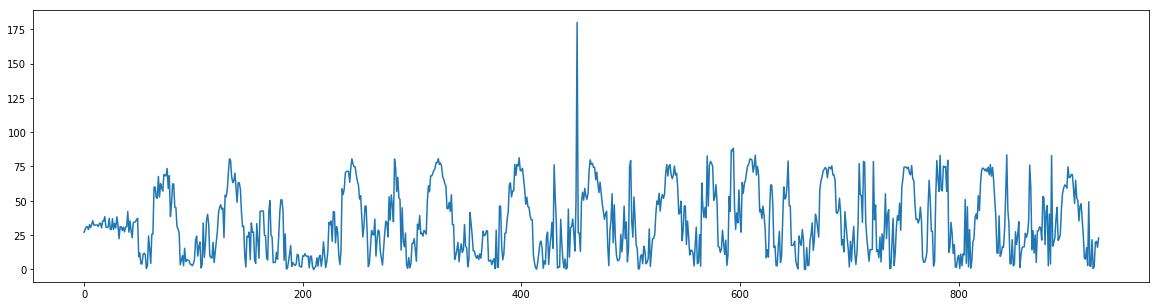

In [15]:
plt.figure(figsize=(20,5))

plt.plot(frame_x, angles)
# count the number of times the person squatted based on the number of times the angle is 90 degrees

The patient squated 12 times


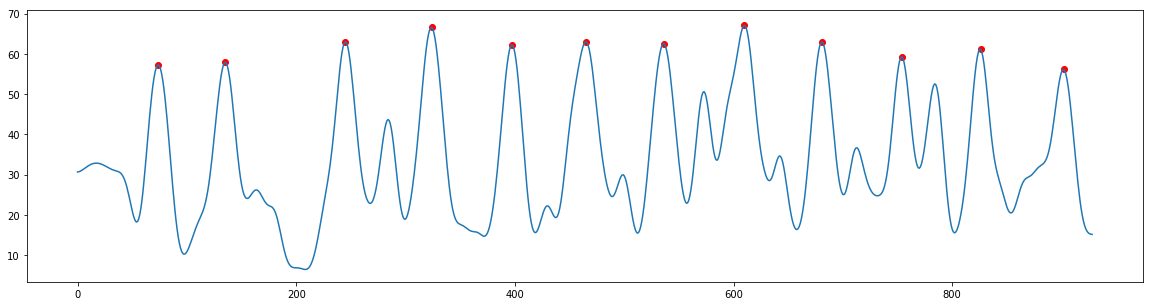

In [28]:
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import find_peaks

y_filtered = gaussian_filter1d(angles, 6)
plt.figure(figsize=(20,5))

plt.plot(frame_x, y_filtered)

peak_indexes = find_peaks(y_filtered, distance=50, height=50)

peak_x = []
peak_y = []

for peak_index in list(peak_indexes[0]):
    peak_x.append(frame_x[peak_index])
    peak_y.append(y_filtered[peak_index])
    
plt.scatter(peak_x, peak_y, c='red')


print("The patient squated {} times".format(len(peak_y)))

In [43]:
print(json.dumps(json_file_data, indent=1, sort_keys=True))

{
 "people": [
  {
   "face_keypoints_2d": [],
   "face_keypoints_3d": [],
   "hand_left_keypoints_2d": [],
   "hand_left_keypoints_3d": [],
   "hand_right_keypoints_2d": [],
   "hand_right_keypoints_3d": [],
   "pose_keypoints_2d": [
    472.949,
    223.671,
    0.851208,
    433.827,
    234.068,
    0.756772,
    442.903,
    235.46,
    0.779556,
    454.656,
    278.545,
    0.73852,
    440.349,
    294.166,
    0.196527,
    427.277,
    226.316,
    0.606573,
    0,
    0,
    0,
    0,
    0,
    0,
    375.074,
    301.987,
    0.519537,
    379.012,
    304.581,
    0.568668,
    457.319,
    318.927,
    0.739473,
    458.611,
    401.222,
    0.582541,
    369.851,
    299.403,
    0.393886,
    459.899,
    317.665,
    0.548177,
    449.488,
    401.191,
    0.565165,
    471.662,
    214.557,
    0.844839,
    0,
    0,
    0,
    454.701,
    209.331,
    0.821199,
    0,
    0,
    0,
    476.872,
    411.653,
    0.163969,
    0,
    0,
    0,
    441.602,
    410.3

In [19]:
json_file_data["people"][0]["pose_keypoints_2d"][8]

0.905666

In [20]:
determine_angle_for_json_file(json_file_data=json_file_data, person_number=0, segment1="8-9", segment2='9-10')

83.84331528274771